In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from scipy.optimize import fsolve

In [2]:
N=100
l  = 0.3 
h = 0.01 #величина шага 
steps = 3000 #выполним столько шагов 
results = np.zeros((N, steps)) # массив для хранения результатов, заполняем сначала нулями 
results[0] = np.ones(steps) # задаем n1 константное значение 

In [3]:
def function(k, step,results):
    """Это правая часть уравнений. k -номер уравнения, step - номер шага"""
    
    pairs = []
    for i in range(1, k):
        pairs.append((i, k-i))
 
    all_sum = 0.0 #будем собирать здесь всю сумму 
    for x, y in pairs: 
        all_sum = all_sum + 0.5*results[x-1][step-1]*results[y-1][step-1] #? 
    for i in range(N):
    
        all_sum = all_sum - (1+l)*results[i][step-1]*results[k-1][step-1] #k-1 из-за индексации 
        
    return all_sum

In [4]:
for j in range(1, steps): # цикл по шагам 
    
    for i in range(2, 101): # цикл по n_k 
        
        results[i-1][j] = results[i-1][j-1] + h * function(i,j, results)
 

In [5]:
times  = np.cumsum(np.ones(steps)/steps)-0.001

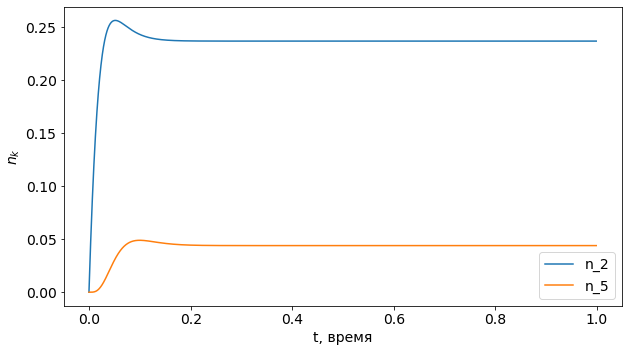

In [6]:
plt.figure(figsize=(10,5.5)) 
plt.xlabel('t, время', fontsize = 14)
plt.ylabel(r"$n_k$", fontsize=14)
plt.plot(times, results[1], '-', label = "n_2")
#plt.plot(times, results[2], '-', label = "n_3")
#plt.plot(times, results[3], '-', label = "n_4")
plt.plot(times, results[4], '-', label = "n_5")
#plt.plot(times, results[9], '-', label = "n_10")
#plt.plot(times, results[99], '-', label = "n_100")
plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14) 
plt.legend(loc='best', fontsize = 14)
 

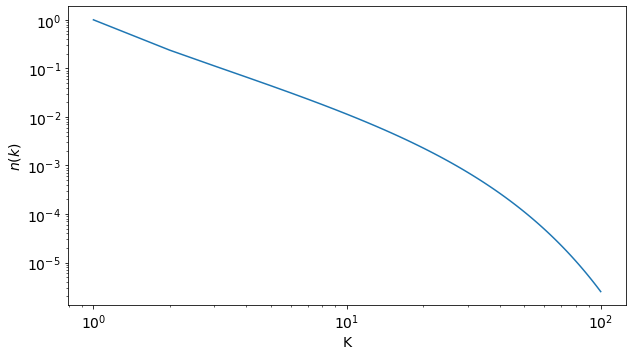

In [7]:

plt.figure(figsize=(10,5.5)) 
plt.xlabel('K', fontsize = 14)
plt.ylabel(r"$n(k)$", fontsize=14)
plt.loglog([i+1 for i in range(N)], results[:,steps-1], "-")
plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14) 
#plt.legend(loc='best', fontsize = 14)
 